In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# 全てのゲーム情報の取得

from gym import envs
envids = [spec.id for spec in envs.registry.all()]
envids

['Copy-v0',
 'RepeatCopy-v0',
 'ReversedAddition-v0',
 'ReversedAddition3-v0',
 'DuplicatedInput-v0',
 'Reverse-v0',
 'CartPole-v0',
 'CartPole-v1',
 'MountainCar-v0',
 'MountainCarContinuous-v0',
 'Pendulum-v0',
 'Acrobot-v1',
 'LunarLander-v2',
 'LunarLanderContinuous-v2',
 'BipedalWalker-v2',
 'BipedalWalkerHardcore-v2',
 'CarRacing-v0',
 'Blackjack-v0',
 'KellyCoinflip-v0',
 'KellyCoinflipGeneralized-v0',
 'FrozenLake-v0',
 'FrozenLake8x8-v0',
 'CliffWalking-v0',
 'NChain-v0',
 'Roulette-v0',
 'Taxi-v3',
 'GuessingGame-v0',
 'HotterColder-v0',
 'Reacher-v2',
 'Pusher-v2',
 'Thrower-v2',
 'Striker-v2',
 'InvertedPendulum-v2',
 'InvertedDoublePendulum-v2',
 'HalfCheetah-v2',
 'HalfCheetah-v3',
 'Hopper-v2',
 'Hopper-v3',
 'Swimmer-v2',
 'Swimmer-v3',
 'Walker2d-v2',
 'Walker2d-v3',
 'Ant-v2',
 'Ant-v3',
 'Humanoid-v2',
 'Humanoid-v3',
 'HumanoidStandup-v2',
 'FetchSlide-v1',
 'FetchPickAndPlace-v1',
 'FetchReach-v1',
 'FetchPush-v1',
 'HandReach-v0',
 'HandManipulateBlockRotateZ-v0',

In [2]:
# ゲームの設定と情報
env = gym.make('SpaceInvaders-v4')
print('Observation Space: ', env.observation_space)
print('Action Space: ', env.action_space)
print('Action meanings: ', env.unwrapped.get_action_meanings())

Observation Space:  Box(210, 160, 3)
Action Space:  Discrete(6)
Action meanings:  ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']


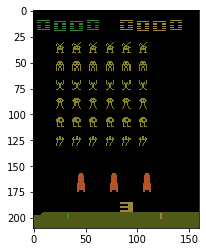

In [3]:
# 初期状態の確認
observation = env.reset()
plt.imshow(observation)

In [28]:
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display 

def save_frames(frames, savefile):
    """ Displays a list of frames as a gif, with controls
    
        Parameters:
            frames ([pixels]) -- animation sequence of images
            savefile (str)    -- savefile.mp4
    """
#     if not filename.endswith('.mp4'):
#         filename += '.mp4'
    
    plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0), dpi=72) # dpi: number of pixels per 1 inch
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    anim.save(savefile, writer='ffmpeg')
    
#     display(display_animation(anim))

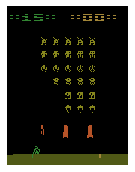

In [29]:
frames = []
observation = env.reset()

for step in range(1000):
    frames.append(observation)
    
    action = env.action_space.sample()
    observation_next, reward, done, info = env.step(action)
    observation = observation_next
    
    if done:
        break

save_frames(frames, savefile='spaceinvaders.mp4')